# Citibike Capstone Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np

Import all of our files into a dataframe

In [2]:
files = ['202004_trip_data.csv','202005_trip_data.csv','202006_trip_data.csv','202007_trip_data.csv','202008_trip_data.csv','202009_trip_data.csv','202010_trip_data.csv','202011_trip_data.csv','202012_trip_data.csv','202101_trip_data.csv','202102_trip_data.csv','202103_trip_data.csv']

In [3]:
dataframes = [pd.read_csv(file) for file in files]

df = pd.concat(dataframes, ignore_index=True)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 346.1+ MB


### Add columns of interest

We will first reorder and rename columns to a more readable table.

In [6]:
col_list = ['ride_id','member_casual','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng']

df1 = df[col_list]

In [7]:
df1.head()

,ride_id,member_casual,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng
0,A847FADBBC638E45,member,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586
1,5405B80E996FF60D,member,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238
2,5DD24A79A4E006F4,member,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230
3,2A59BBDF5CDBA725,member,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722
4,27AD306C119C6158,casual,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547


Rename columns to all capital letters

In [8]:
df.columns = [col.upper() for col in df.columns]

df.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


#### Ride time in seconds

Convert time columns to datetime datatype for analysis.

In [9]:
# convert starte_at and ended_at to datetime
df['STARTED_AT'] = pd.to_datetime(df['STARTED_AT'])
df['ENDED_AT'] = pd.to_datetime(df['ENDED_AT'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   RIDE_ID             object        
 1   RIDEABLE_TYPE       object        
 2   STARTED_AT          datetime64[ns]
 3   ENDED_AT            datetime64[ns]
 4   START_STATION_NAME  object        
 5   START_STATION_ID    object        
 6   END_STATION_NAME    object        
 7   END_STATION_ID      object        
 8   START_LAT           float64       
 9   START_LNG           float64       
 10  END_LAT             float64       
 11  END_LNG             float64       
 12  MEMBER_CASUAL       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 346.1+ MB


In [10]:
from datetime import datetime

Create column for ride time in seconds.

In [11]:
df['RIDE_TIME'] = (df['ENDED_AT'] - df['STARTED_AT']).dt.total_seconds()

df.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,3175.0


Add column for day of week, month, and season.

day_of_week: 0 = Monday ... 6 = Sunday

month: 1 = January ... 12 = December

season: we will use meteorological seasons
   * Spring: March 1 - May 31
   * Summer: June 1 - August 31
   * Autumn: September 1 - November 30
   * Winter: December 1 - February 28(29)

#### Day of week

In [12]:
df['DAY_OF_WEEK'] = df['STARTED_AT'].dt.dayofweek

df.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,3175.0,5


In [13]:
df['DAY_NAME'] = df['STARTED_AT'].dt.day_name()

df.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4,Friday
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,3175.0,5,Saturday


#### Month

In [14]:
df['MONTH'] = df['STARTED_AT'].dt.month
df.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday,4
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4,Friday,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday,4
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday,4
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,3175.0,5,Saturday,4


#### Season

We'll create a function to get the season and then apply the function to the month column to create the SEASON column.

In [15]:
def season(data):
    if data.month in [3,4,5]:
        return 'spring'
    if data.month in [6,7,8]:
        return 'summer'
    if data.month in [9,10,11]:
        return 'autumn'
    else:
        return 'winter'
    
#add season column
df['SEASON'] = df['STARTED_AT'].apply(season)

In [16]:
df.head(10)

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday,4,spring
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,3175.0,5,Saturday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,324.0,3,Thursday,4,spring
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member,313.0,3,Thursday,4,spring
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual,4549.0,1,Tuesday,4,spring
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual,344.0,2,Wednesday,4,spring
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508,41.8846,-87.7063,41.9097,-87.7166,member,1039.0,5,Saturday,4,spring


### Explore data to see what needs to be cleaned

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Day of Week ride frequency')

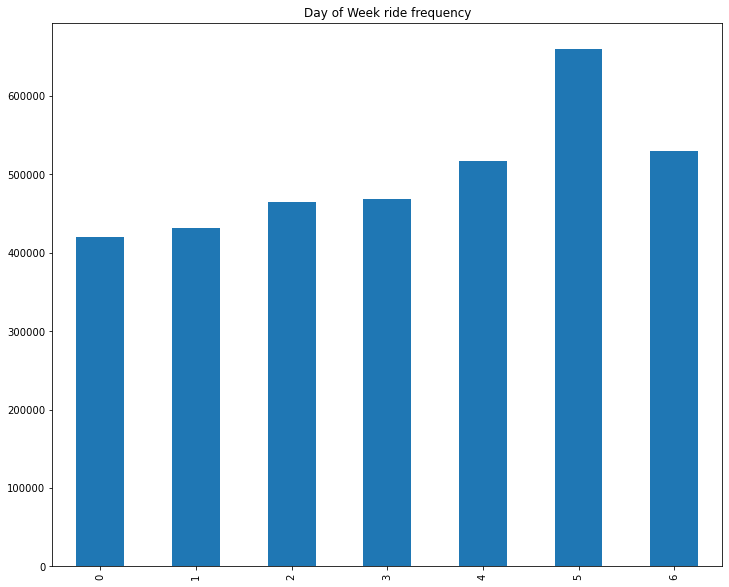

In [18]:
df['DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar', figsize=(12,10))
plt.title('Day of Week ride frequency')

Let's now see the breakdown by subscriber type and day of week

In [19]:
values1 = df[['DAY_NAME','MEMBER_CASUAL']].value_counts()
values1 = values1.reset_index()
values1.columns = ['DAY_NAME','SUB_TYPE','COUNT']

In [20]:
# order the days of the week for easier plotting
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
values1['DAY_NAME'] = pd.Categorical(values1['DAY_NAME'], categories=days, ordered=True)

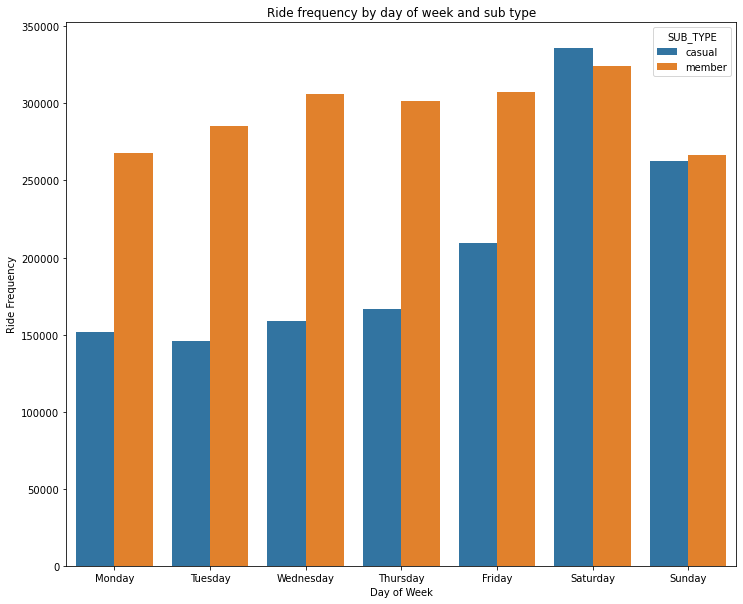

In [21]:
# use seasborn to plot both columns with color
import seaborn as sns

plt.figure(figsize=(12,10))

sns.barplot(x='DAY_NAME',y='COUNT',hue='SUB_TYPE', data= values1)

plt.title('Ride frequency by day of week and sub type')
plt.xlabel('Day of Week')
plt.ylabel('Ride Frequency')


plt.show()

As we can see above, memebers are more consistent users when compared to casual users. There is great potential in casual users to be converted into memebers due to high volume use during the weekends.

#### Ride frequency

In [22]:
df['MEMBER_CASUAL'].value_counts(normalize=True)

member    0.590121
casual    0.409879
Name: MEMBER_CASUAL, dtype: float64

#### Total ride time

In [23]:
ride_time = df.groupby('MEMBER_CASUAL')['RIDE_TIME'].sum()

ride_time = ride_time.reset_index()
ride_time.columns = ['SUB_TYPE','RIDE_TIME']

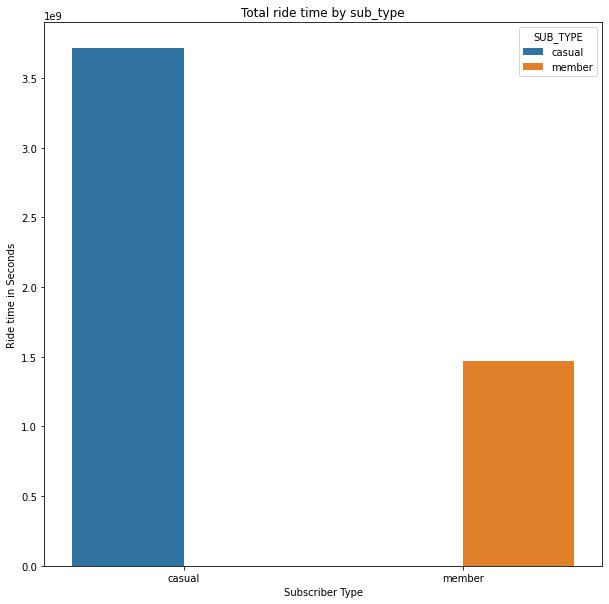

In [24]:
plt.figure(figsize=(10,10))

sns.barplot(x='SUB_TYPE', y='RIDE_TIME', hue='SUB_TYPE', data=ride_time)

plt.title('Total ride time by sub_type')
plt.xlabel('Subscriber Type')
plt.ylabel('Ride time in Seconds')

plt.show()

So far, it appears that causal riders makeup the vast majority of ride time.

#### Ride time by Month

In [25]:
ride_month = df.groupby(['MONTH','MEMBER_CASUAL'])['RIDE_TIME'].sum()

ride_month = ride_month.reset_index()
ride_month.columns = ['MONTH','SUB_TYPE','RIDE_TIME']

ride_month.head()

,MONTH,SUB_TYPE,RIDE_TIME
0,1,casual,27919663.0
1,1,member,60794413.0
2,2,casual,30012011.0
3,2,member,42702609.0
4,3,casual,192395561.0


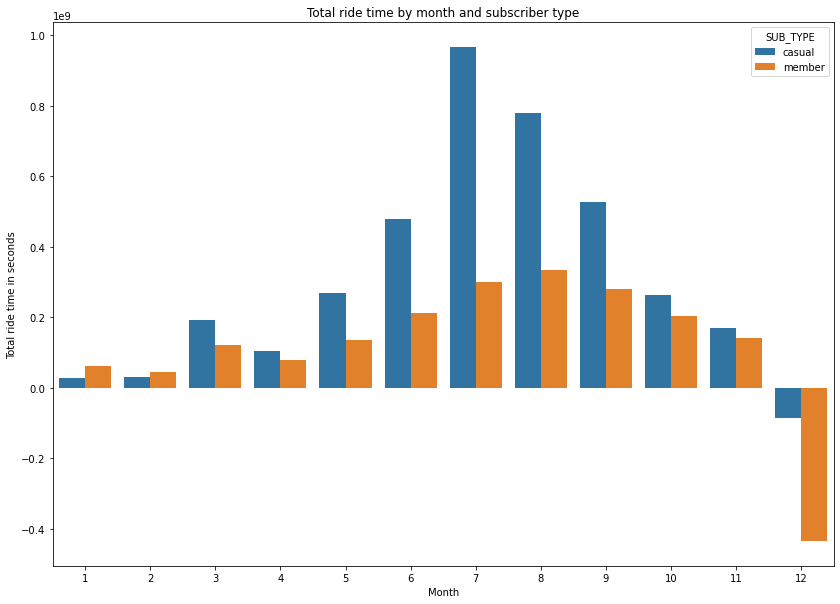

In [26]:
plt.figure(figsize=(14,10))

sns.barplot(x='MONTH',y='RIDE_TIME',hue='SUB_TYPE', data=ride_month)
plt.title('Total ride time by month and subscriber type')
plt.xlabel('Month')
plt.ylabel('Total ride time in seconds')

plt.show()

Clearly we have some outliers to deal with. Even still, we will expect casual users total ride time to be higher than members ride time. To get another picture of ride usage by month we will use frequency instead.

In [27]:
ride_month_freq = df[['MONTH','MEMBER_CASUAL']].value_counts().sort_index()

ride_month_freq = ride_month_freq.reset_index()
ride_month_freq.columns = ['MONTH','SUB_TYPE','FREQUENCY']

ride_month_freq.head()

,MONTH,SUB_TYPE,FREQUENCY
0,1,casual,18117
1,1,member,78717
2,2,casual,10131
3,2,member,39491
4,3,casual,84033


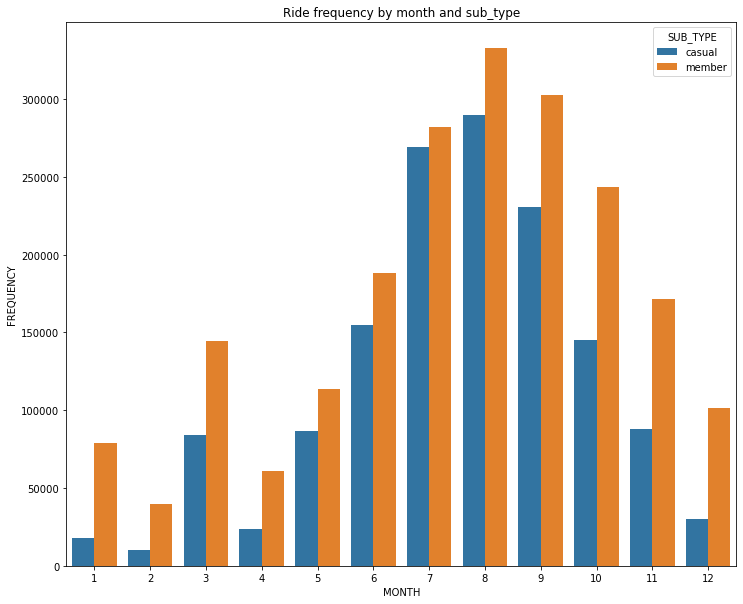

In [28]:
plt.figure(figsize=(12,10))

sns.barplot(x='MONTH',y='FREQUENCY',hue='SUB_TYPE', data=ride_month_freq)

plt.title('Ride frequency by month and sub_type')

plt.show()

Let us dig into these ride time outliers now to clean up our data.

In [29]:
df['RIDE_TIME'].describe()/60

count    58162.466667
mean        24.766641
std        390.421606
min     -29049.966667
25%          7.883333
50%         14.516667
75%         26.633333
max      58720.033333
Name: RIDE_TIME, dtype: float64

We will remove any ride time less than 60 seconds as anything less could be the results of an accidental use or cancelled use.

#### Remove ride times less than 60 seconds

In [30]:
df_f1 = df[df['RIDE_TIME'] >= 60]

Now let's plot the distribution of ride time.

In [31]:
ride_dist = df_f1['RIDE_TIME'].value_counts().sort_index()
ride_dist = ride_dist.reset_index()
ride_dist.columns = ['RIDE_TIME','FREQUENCY']
ride_dist.tail()

,RIDE_TIME,FREQUENCY
25566,3068756.0,1
25567,3248667.0,1
25568,3257001.0,1
25569,3341033.0,1
25570,3523202.0,1


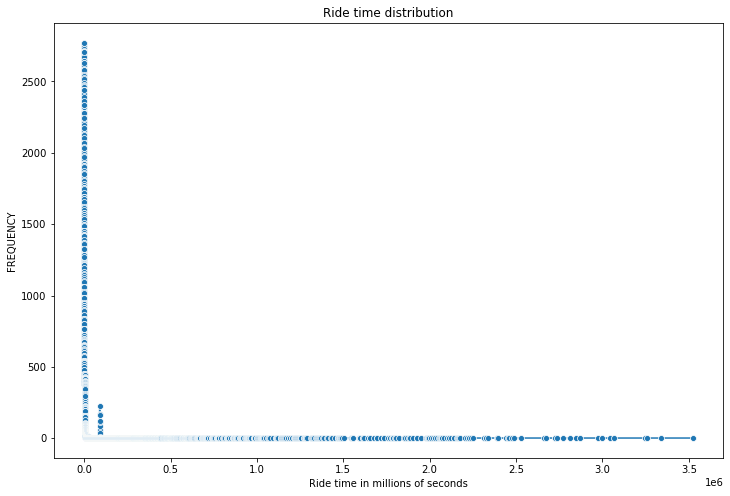

In [32]:
plt.figure(figsize=(12,8))

sns.lineplot(data=ride_dist, x='RIDE_TIME',y='FREQUENCY', marker='o')

plt.title('Ride time distribution')
plt.xlabel('Ride time in millions of seconds')

plt.show()

In [33]:
df_f1['RIDE_TIME'].describe(percentiles=[.25,.5,.75,.80,.90,.95,.98,.99,.995]).apply(lambda x: format(x, 'f'))

count    3429432.000000
mean        1701.065954
std        15279.340026
min           60.000000
25%          491.000000
50%          888.000000
75%         1616.000000
80%         1855.000000
90%         2799.000000
95%         4430.000000
98%         7163.000000
99%         9693.000000
99.5%      13138.000000
max      3523202.000000
Name: RIDE_TIME, dtype: object

In [34]:
# We will start by keeping only data with the 99th percentile and plotting the distribution

per_99 = 9693 # 99th percentile in seconds

df_f2 = df_f1[df_f1['RIDE_TIME'] <= 9693]

In [35]:
df_f2['RIDE_TIME'].describe(percentiles=[.25,.5,.75,.80,.90,.95,.96,.97,.98,.99]).apply(lambda x: format(x, 'f'))

count    3395142.000000
mean        1297.052342
std         1332.513149
min           60.000000
25%          487.000000
50%          878.000000
75%         1585.000000
80%         1811.000000
90%         2650.000000
95%         3970.000000
96%         4450.000000
97%         5069.000000
98%         5910.000000
99%         7181.000000
max         9693.000000
Name: RIDE_TIME, dtype: object

In [36]:
ride_dist2 = df_f2['RIDE_TIME'].value_counts().sort_index()
ride_dist2 = ride_dist2.reset_index()
ride_dist2.columns = ['RIDE_TIME','FREQUENCY']
ride_dist2.head()

,RIDE_TIME,FREQUENCY
0,60.0,420
1,61.0,418
2,62.0,398
3,63.0,414
4,64.0,441


In [37]:
# IQR outlier. 1.5* 75th percentile
out_1 = 1.5*1585
print(out_1)

2377.5


In [38]:
sns.set_theme()

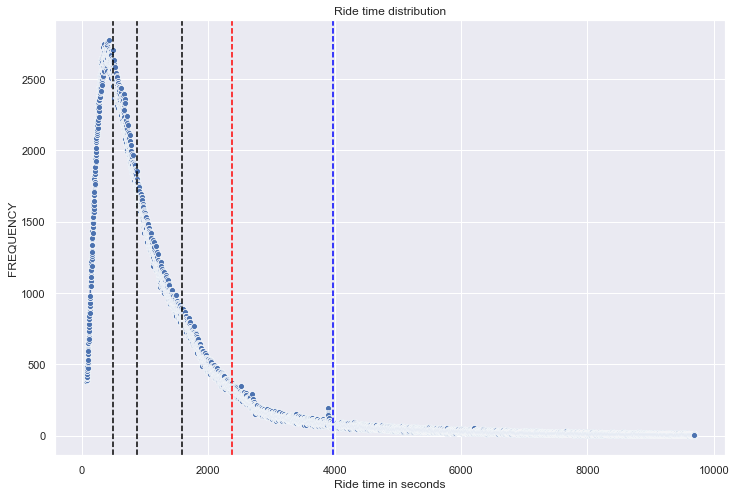

In [39]:
# plot distribution

plt.figure(figsize=(12,8))

sns.lineplot(data=ride_dist2, x='RIDE_TIME',y='FREQUENCY',marker='o')

plt.title('Ride time distribution')
plt.xlabel('Ride time in seconds')

plt.axvline(487, color='black', linestyle='--') # 25th percentile
plt.axvline(878, color='black', linestyle='--') # 50th
plt.axvline(1585, color='black', linestyle='--')# 75th
plt.axvline(2377.5, color='red', linestyle='--')# IQR outlier mark
plt.axvline(3970, color='blue', linestyle='--')  # 95th

plt.show()

The black lines show the IQR, red the IQR outlier, and blue the 90th percentile mark.

We will remove all events past the ride line to clean up our data.

In [40]:
df_f3 = df_f2[df_f2['RIDE_TIME'] <= 2377.5]
df_f3['RIDE_TIME'].describe().apply(lambda x: format(x, 'f'))

count    2977496.000000
mean         897.955502
std          558.015618
min           60.000000
25%          447.000000
50%          766.000000
75%         1261.000000
max         2377.000000
Name: RIDE_TIME, dtype: object

In [41]:
df_f3['RIDE_TIME'].median()

766.0

Now with ride time cleaned, our mean ride time is 897 seconds or about 15 minutes.

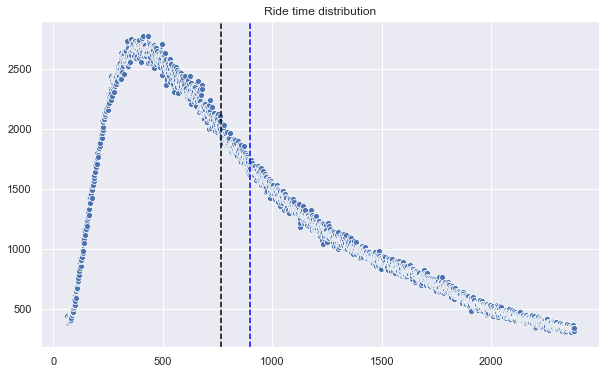

In [42]:
ride_freq = df_f3['RIDE_TIME'].value_counts()

plt.figure(figsize=(10,6))
sns.lineplot(x=ride_freq.index, y=ride_freq.values, marker='o')

plt.axvline(897, color='blue', linestyle='--')
plt.axvline(766, color='black', linestyle='--')
plt.title('Ride time distribution')

plt.show()

Mean:   897 s

Median: 766 s

#### Check station names and why they are null

In [43]:
df_f3.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,324.0,3,Thursday,4,spring


In [44]:
df_f3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977496 entries, 0 to 3489747
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   RIDE_ID             object        
 1   RIDEABLE_TYPE       object        
 2   STARTED_AT          datetime64[ns]
 3   ENDED_AT            datetime64[ns]
 4   START_STATION_NAME  object        
 5   START_STATION_ID    object        
 6   END_STATION_NAME    object        
 7   END_STATION_ID      object        
 8   START_LAT           float64       
 9   START_LNG           float64       
 10  END_LAT             float64       
 11  END_LNG             float64       
 12  MEMBER_CASUAL       object        
 13  RIDE_TIME           float64       
 14  DAY_OF_WEEK         int64         
 15  DAY_NAME            object        
 16  MONTH               int64         
 17  SEASON              object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(9)
memory usage: 431.6+ MB


In [45]:
df_f3.isnull().sum()

RIDE_ID                    0
RIDEABLE_TYPE              0
STARTED_AT                 0
ENDED_AT                   0
START_STATION_NAME    108764
START_STATION_ID      109305
END_STATION_NAME      120044
END_STATION_ID        120424
START_LAT                  0
START_LNG                  0
END_LAT                 1733
END_LNG                 1733
MEMBER_CASUAL              0
RIDE_TIME                  0
DAY_OF_WEEK                0
DAY_NAME                   0
MONTH                      0
SEASON                     0
dtype: int64

We will remove instances where the station names are missing.

In [46]:
df_f4 = df_f3.dropna(subset=['START_STATION_NAME','END_STATION_NAME','START_STATION_ID','END_STATION_ID'])

df_f4.isnull().sum()

RIDE_ID               0
RIDEABLE_TYPE         0
STARTED_AT            0
ENDED_AT              0
START_STATION_NAME    0
START_STATION_ID      0
END_STATION_NAME      0
END_STATION_ID        0
START_LAT             0
START_LNG             0
END_LAT               0
END_LNG               0
MEMBER_CASUAL         0
RIDE_TIME             0
DAY_OF_WEEK           0
DAY_NAME              0
MONTH                 0
SEASON                0
dtype: int64

In [47]:
df_f4['RIDE_TIME'].describe().apply(lambda x: format(x, 'f'))

count    2809572.000000
mean         905.060441
std          558.127942
min           60.000000
25%          454.000000
50%          774.000000
75%         1270.000000
max         2377.000000
Name: RIDE_TIME, dtype: object

Let's look at how bike type behoviors look like.

In [48]:
df_f4['RIDEABLE_TYPE'].value_counts()

docked_bike      2130309
electric_bike     383720
classic_bike      295543
Name: RIDEABLE_TYPE, dtype: int64

In [49]:
df_f4[['RIDEABLE_TYPE','MEMBER_CASUAL']].value_counts().sort_index()

RIDEABLE_TYPE  MEMBER_CASUAL
classic_bike   casual             57430
               member            238113
docked_bike    casual            786627
               member           1343682
electric_bike  casual            140515
               member            243205
dtype: int64

In [50]:
bike_freq = df_f4[['RIDEABLE_TYPE','MEMBER_CASUAL']].value_counts().sort_index()

bike_freq = bike_freq.reset_index()
bike_freq.columns = ['BIKE_TYPE','SUB_TYPE','FREQUENCY']

bike_freq.head()

,BIKE_TYPE,SUB_TYPE,FREQUENCY
0,classic_bike,casual,57430
1,classic_bike,member,238113
2,docked_bike,casual,786627
3,docked_bike,member,1343682
4,electric_bike,casual,140515


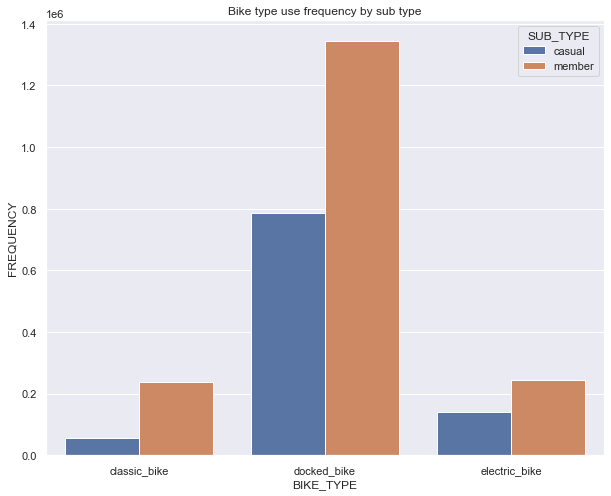

In [51]:
plt.figure(figsize=(10,8))

sns.barplot(x='BIKE_TYPE',
            y='FREQUENCY',
            hue='SUB_TYPE',
           data=bike_freq)

plt.title('Bike type use frequency by sub type')

plt.show()

In [52]:
df_f4['MEMBER_CASUAL'].value_counts(normalize=True)

member    0.649565
casual    0.350435
Name: MEMBER_CASUAL, dtype: float64

Initial proportions were member: .59 and casual: .41

## Coordinate cleanup

In [53]:
df_f4.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,324.0,3,Thursday,4,spring


In [54]:
# we will use the median latitude and longitude values to set every other value for a given station to be the same.

def set_median_value(df, station_col, val_col):
    # calculate median value
    median_value = df.groupby(station_col)[val_col].median()
    
    #update value for each station name to the median value
    for station in median_value.index:
        df.loc[df[station_col] == station, val_col] = median_value[station]
        
    return df
    

In [55]:
df_f5 = set_median_value(df_f4, 'START_STATION_NAME', 'START_LAT')

C:\Users\irama\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [56]:
df_f5.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896373,-87.6610,41.9322,-87.6586,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924398,-87.7154,41.9306,-87.7238,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894503,-87.6179,41.8679,-87.6230,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903029,-87.6975,41.8992,-87.6722,member,732.0,1,Tuesday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896910,-87.6217,41.8923,-87.6120,member,324.0,3,Thursday,4,spring


In [57]:
df_f6 = set_median_value(df_f5, 'START_STATION_NAME', 'START_LNG')

df_f7 = set_median_value(df_f6, 'END_STATION_NAME', 'END_LAT')
df_f8 = set_median_value(df_f7, 'END_STATION_NAME', 'END_LNG')

C:\Users\irama\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [58]:
df_f8.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896373,-87.660983,41.932225,-87.658617,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924398,-87.715441,41.930585,-87.723777,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894503,-87.617854,41.867888,-87.623041,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903029,-87.697474,41.899181,-87.672200,member,732.0,1,Tuesday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896910,-87.621743,41.892278,-87.612043,member,324.0,3,Thursday,4,spring


#### Observe seasonal use

Change season column to categorical type

# order the days of the week for easier plotting
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
values1['DAY_NAME'] = pd.Categorical(values1['DAY_NAME'], categories=days, ordered=True)

In [59]:
df_f8.head()

,RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL,RIDE_TIME,DAY_OF_WEEK,DAY_NAME,MONTH,SEASON
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896373,-87.660983,41.932225,-87.658617,member,1609.0,6,Sunday,4,spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924398,-87.715441,41.930585,-87.723777,member,489.0,4,Friday,4,spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894503,-87.617854,41.867888,-87.623041,member,863.0,2,Wednesday,4,spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903029,-87.697474,41.899181,-87.672200,member,732.0,1,Tuesday,4,spring
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896910,-87.621743,41.892278,-87.612043,member,324.0,3,Thursday,4,spring


In [64]:
season_freq = df_f8[['SEASON','MEMBER_CASUAL']].value_counts().sort_index()

season_freq = season_freq.reset_index()
season_freq.columns = ['SEASON','SUB_TYPE','FREQUENCY']

seasons = ['spring','summer','autumn','winter']
season_freq['SEASON'] =pd.Categorical(season_freq['SEASON'], categories=seasons, ordered=True )

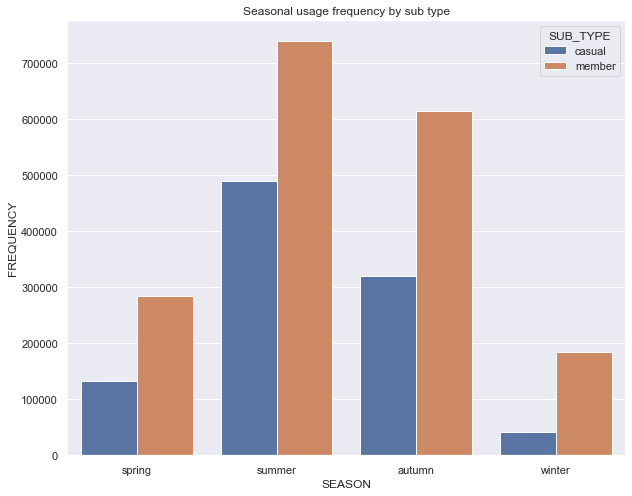

In [65]:
plt.figure(figsize=(10,8))

sns.barplot(x='SEASON', y='FREQUENCY',hue='SUB_TYPE', data=season_freq)
plt.title('Seasonal usage frequency by sub type')

plt.show()

## Final datset

Now that our dataset is clean we can export our file so that we can begin creating our dashboard to present our findings in a more interactive way.